In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/CS171/Business_case_dataset.csv'


Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv(path, header= None)



In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14084 entries, 0 to 14083
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       14084 non-null  int64  
 1   1       14084 non-null  float64
 2   2       14084 non-null  int64  
 3   3       14084 non-null  float64
 4   4       14084 non-null  float64
 5   5       14084 non-null  int64  
 6   6       14084 non-null  float64
 7   7       14084 non-null  float64
 8   8       14084 non-null  float64
 9   9       14084 non-null  int64  
 10  10      14084 non-null  int64  
 11  11      14084 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 1.3 MB


In [4]:
df = df.drop(df.columns[0], axis=1)  # Drop the first column


In [5]:
df.head(5)


,1,2,3,4,5,6,7,8,9,10,11
0,2160.0,2160,10.13,10.13,0,8.91,0.0,0.0,0,0,1
1,1404.0,2808,6.66,13.33,1,6.50,0.0,0.0,0,182,1
2,324.0,324,10.13,10.13,1,9.00,0.0,0.0,1,334,1
3,1620.0,1620,15.31,15.31,0,9.00,0.0,0.0,0,183,1
4,432.0,1296,7.11,21.33,1,9.00,0.0,0.0,0,0,1


In [6]:


# 2) Calculate the mean of the 6th column (index 5)
avg_rating = df[6].mean()
print(avg_rating)

8.909794802612893


In [7]:
# 3) Fill all missing values (NaN) in the 6th column with this mean
df[6] = df[6].fillna(avg_rating)

In [8]:
df.head(3)

,1,2,3,4,5,6,7,8,9,10,11
0,2160.0,2160,10.13,10.13,0,8.91,0.0,0.0,0,0,1
1,1404.0,2808,6.66,13.33,1,6.50,0.0,0.0,0,182,1
2,324.0,324,10.13,10.13,1,9.00,0.0,0.0,1,334,1


In [ ]:
df.to_csv("/content/drive/MyDrive/CS171/cleaned_data2.csv")

In [9]:
# Check for duplicates in the original dataset
duplicate_count = df.duplicated().sum()
print(f"Number of duplicates in dataset: {duplicate_count}")

# If you find duplicates, you need to deduplicate before splitting
# df = df.drop_duplicates()

Number of duplicates in dataset: 3575


In [10]:
# Count total duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicates in dataset: {duplicate_count}")

# Check percentage of duplicates
print(f"Percentage of duplicates: {duplicate_count / len(df) * 100:.2f}%")

# If you want to see the duplicated rows
duplicated_rows = df[df.duplicated(keep='first')]
print(f"First few duplicated rows:\n{duplicated_rows.head()}")

Number of duplicates in dataset: 3575
Percentage of duplicates: 25.38%
First few duplicated rows:
         1     2     3     4   5     6    7      8   9    10  11
34   1620.0  1620  5.33  5.33   0  8.91  0.0    0.0   0    0   1
36   1620.0  1620  5.33  5.33   0  8.91  0.0    0.0   0    0   1
64   2160.0  2160  5.33  5.33   0  8.91  0.0    0.0   0    0   1
66   2160.0  2160  8.00  8.00   0  8.91  0.0    0.0   0  186   1
161  1620.0  1620  8.00  8.00   0  8.91  0.0  734.4   0    0   1


In [11]:
# Get the indices of duplicate rows
duplicate_indices = df[df.duplicated(keep=False)].index.tolist()

# Group duplicates by their values
from collections import defaultdict
duplicate_groups = defaultdict(list)

for idx in duplicate_indices:
    # Create a tuple of the row values that can be used as a dictionary key
    row_tuple = tuple(df.loc[idx].values)
    duplicate_groups[row_tuple].append(idx)

# Print the first few duplicate groups
print("Examples of duplicate groups (rows with identical values):")
for i, (values, indices) in enumerate(list(duplicate_groups.items())[:3]):
    print(f"\nDuplicate group {i+1}:")
    print(f"Appears {len(indices)} times at indices: {indices[:5]}...")
    print(f"Values: {values}")

Examples of duplicate groups (rows with identical values):

Duplicate group 1:
Appears 6 times at indices: [0, 1028, 1030, 1031, 1060]...
Values: (np.float64(2160.0), np.float64(2160.0), np.float64(10.13), np.float64(10.13), np.float64(0.0), np.float64(8.91), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0))

Duplicate group 2:
Appears 2 times at indices: [13, 1201]...
Values: (np.float64(756.0), np.float64(1512.0), np.float64(7.73), np.float64(15.47), np.float64(0.0), np.float64(8.91), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0))

Duplicate group 3:
Appears 6 times at indices: [16, 1003, 1662, 1745, 1785]...
Values: (np.float64(1404.0), np.float64(2808.0), np.float64(5.33), np.float64(10.67), np.float64(0.0), np.float64(8.91), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0))


In [12]:
# Define a function to check exact duplicates
def find_exact_duplicates(df):
    # Get duplicate rows, including the first occurrence
    duplicated_mask = df.duplicated(keep=False)
    duplicated_df = df[duplicated_mask].copy()

    # Sort by values so identical rows are adjacent
    sorted_df = duplicated_df.sort_values(list(df.columns))

    # Print a few examples with all columns visible
    print(f"Total rows in dataset: {len(df)}")
    print(f"Rows with at least one duplicate: {len(duplicated_df)}")
    print("\nExample duplicate groups:")

    # Group by all values and show examples
    for i, (_, group) in enumerate(sorted_df.head(10).groupby(list(df.columns))):
        if i >= 3:  # Show first 3 groups
            break
        print(f"\nDuplicate group {i+1} (appears {len(group)} times):")
        print(group)

# Call the function
find_exact_duplicates(df)

Total rows in dataset: 14084
Rows with at least one duplicate: 4224

Example duplicate groups:

Duplicate group 1 (appears 9 times):
          1    2     3     4   5     6    7    8   9   10  11
7612   216.0  216  5.33  5.33   0  8.91  0.0  0.0   0   0   0
7799   216.0  216  5.33  5.33   0  8.91  0.0  0.0   0   0   0
7927   216.0  216  5.33  5.33   0  8.91  0.0  0.0   0   0   0
10876  216.0  216  5.33  5.33   0  8.91  0.0  0.0   0   0   0
11510  216.0  216  5.33  5.33   0  8.91  0.0  0.0   0   0   0
11528  216.0  216  5.33  5.33   0  8.91  0.0  0.0   0   0   0
11694  216.0  216  5.33  5.33   0  8.91  0.0  0.0   0   0   0
12586  216.0  216  5.33  5.33   0  8.91  0.0  0.0   0   0   0
12624  216.0  216  5.33  5.33   0  8.91  0.0  0.0   0   0   0

Duplicate group 2 (appears 1 times):
         1    2     3     4   5     6    7    8   9   10  11
7572  216.0  216  5.33  5.33   1  10.0  0.0  0.0   0   0   0


In [13]:
# Before removing duplicates
print(f"Original dataset shape: {df.shape}")

# Remove exact duplicates only
df_no_duplicates = df.drop_duplicates()

# After removing duplicates
print(f"Dataset shape after removing duplicates: {df_no_duplicates.shape}")
print(f"Removed {len(df) - len(df_no_duplicates)} duplicate rows")

Original dataset shape: (14084, 11)
Dataset shape after removing duplicates: (10509, 11)
Removed 3575 duplicate rows


In [14]:
# Find number of positive targets ( = 1)
print(df[11].sum())


2237


In [21]:
# Save dataframe with column filled and duplicates removed to csv
df_no_duplicates.to_csv("/content/drive/MyDrive/CS171/cleaned_data3.csv")


Correlation between columns '3' (Price_overall) and '4' (Price_avg):
          3         4
3  1.000000  0.902491
4  0.902491  1.000000


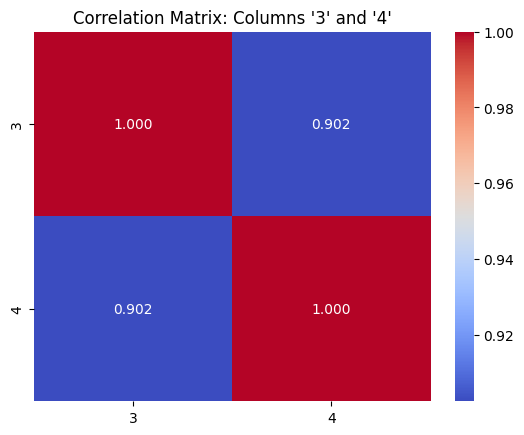

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation between columns "3" and "4"
corr_matrix = df[[3, 4]].corr()

# Print correlation value
print("Correlation between columns '3' (Price_overall) and '4' (Price_avg):")
print(corr_matrix)

# Visualize correlation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title("Correlation Matrix: Columns '3' and '4'")
plt.show()